## Day 43: Time Series Data Analysis 

For this challenge, you are going to explore the time series 
data. These challenges will teach you how to manipulate 
and visualize time series analysis using Python. You will 
import the time_series_data CSV file. 

1. Resample the dataset at daily intervals and calculate the 
maximum value for each day.  


In [17]:
import pandas as pd
df = pd.read_csv("time_series_data.csv")
df.head()

,date,value
0,2022-01-01 00:00:00,0.897366
1,2022-01-01 01:00:00,0.389095
2,2022-01-01 02:00:00,0.849054
3,2022-01-01 03:00:00,0.526571
4,2022-01-01 04:00:00,0.403405


In [18]:
# checking datatype
df.dtypes

date      object
value    float64
dtype: object

In [19]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [20]:
# Convert date to datetime format
df_copy['date'] = pd.to_datetime(df_copy.date)

# Set date as index
df_copy.set_index('date', inplace=True)
df_copy.head()


,value
date,
2022-01-01 00:00:00,0.897366
2022-01-01 01:00:00,0.389095
2022-01-01 02:00:00,0.849054
2022-01-01 03:00:00,0.526571
2022-01-01 04:00:00,0.403405


In [21]:
day_max = df_copy.resample('D').max()
day_max

,value
date,
2022-01-01,0.966448
2022-01-02,0.922851


2. Create a line plot of the dataset, where the x-axis is the 
date and time and the y-axis is the value. 


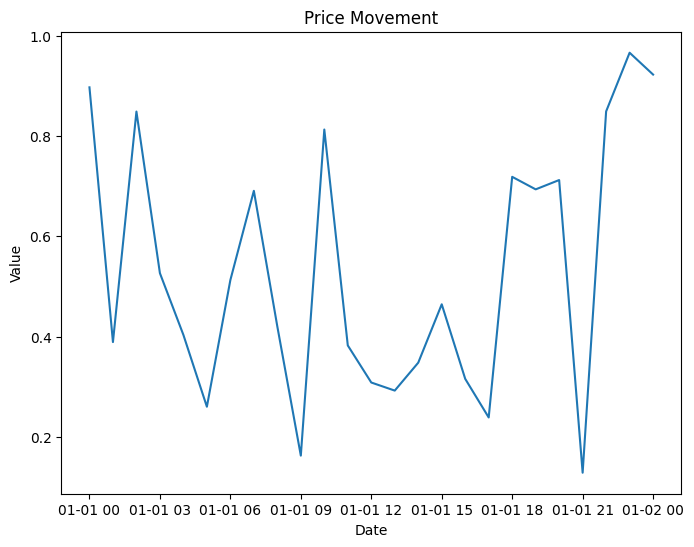

In [23]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.plot(df_copy.index, df_copy['value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("Price Movement", fontsize=12)
plt.show()

3. Create a bar plot of the dataset, where the x-axis is the hour 
of the day (0–23), and the y-axis is the mean value for each 
hour. 


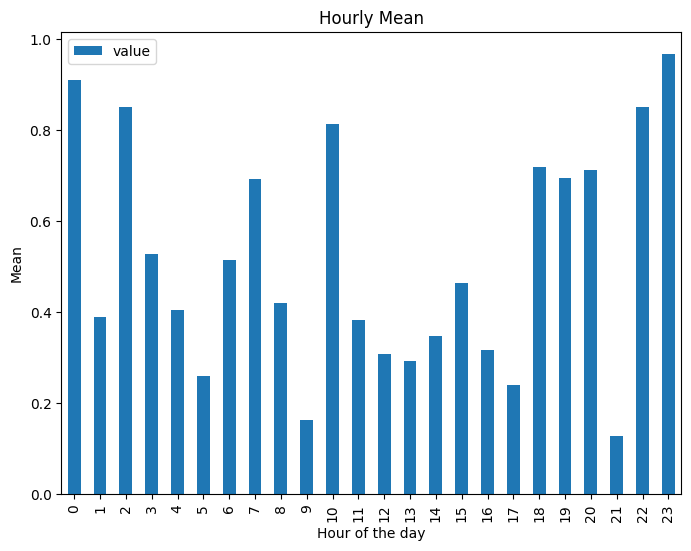

In [27]:
# Grouping data by index and calculating mean 

hour_mean = df_copy.groupby(df_copy.index.hour).mean()

hour_mean.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Hour of the day')
plt.ylabel('Mean')
plt.title("Hourly Mean", fontsize=12)
plt.show()

4. The rolling average is a widely used statistical tool that 
smooths out short-term fluctuations in data and shows the 
longer-term trend of the data. Calculate the rolling average 
of the dataset using a window size of 3, and plot the original 
values and the rolling average on the same plot. 

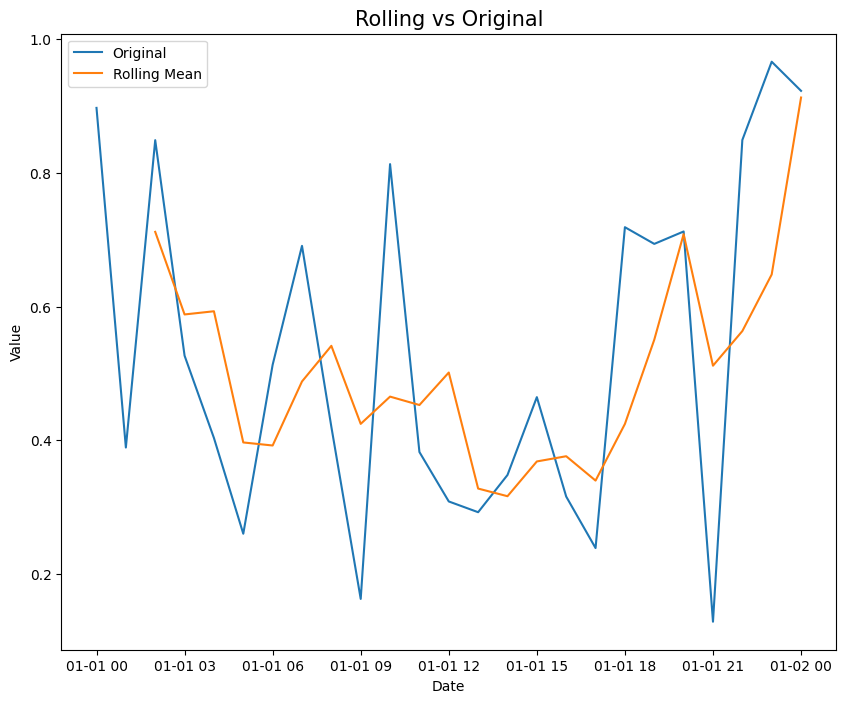

In [31]:
rolling_mean = df_copy.rolling(window=3).mean()

plt.figure(figsize=(10, 8))
plt.plot(df_copy.index, df_copy['value'], label='Original')
plt.plot(rolling_mean.index, rolling_mean['value'], label='Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("Rolling vs Original", fontsize=15)
plt.legend()
plt.show()